**Data Analytics of Ford-GoBike**
1. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
2. Multiple data files will need to be joined together if a full year’s coverage is desired.
3. The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import zipfile
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/Dataset/FordGoData'
zip_files = [f for f in os.listdir(folder_path) if f.endswith('.zip')]

dfs = []

for zip_file in zip_files:
    # Extract the zip file
    with zipfile.ZipFile(os.path.join(folder_path, zip_file), 'r') as zip_ref:
        zip_ref.extractall(folder_path)

In [ ]:
def merge_csv_files(folder_path, output_file):
    """
    Merges all CSV files in a given folder into a single output file.

    Args:
        folder_path: Path to the folder containing the CSV files.
        output_file: Path to the output file.
    """

    all_files = os.listdir(folder_path)
    csv_files = [f for f in all_files if f.endswith('.csv')]

    dfs = []
    for filename in csv_files:
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df.to_csv(output_file, index=False)

In [ ]:
folder_path = '/content/drive/MyDrive/Dataset/FordGoData'
output_file = '/content/drive/MyDrive/Dataset/FordGoData/merged_data.csv'
merge_csv_files(folder_path, output_file)

print(f"Merged data saved to {output_file}")

Merged data saved to /content/drive/MyDrive/Dataset/FordGoData/merged_data.csv


In [3]:
df_bike = pd.read_csv('/content/drive/MyDrive/Dataset/FordGoData/merged_data.csv')

In [4]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No


In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995084 entries, 0 to 1995083
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 243.5+ MB


In [6]:
df_bike.nunique()

,0
duration_sec,16709
start_time,1863584
end_time,1863610
start_station_id,331
start_station_name,348
start_station_latitude,369
start_station_longitude,370
end_station_id,331
end_station_name,348
end_station_latitude,370


In [7]:
df_bike.duplicated().sum()

131363

In [8]:
#drop duplicate
df_bike.drop_duplicates(inplace=True)
df_bike.duplicated().any()

False

1. Data Cleaning

In [9]:
df_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [10]:
#remove insignificant data
df_bike.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [11]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,217.0,27th St at MLK Jr Way,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,NaN,NaN,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,NaN,NaN,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,19.0,Post St at Kearny St,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),368.0,Myrtle St at Polk St,4820,Customer,NaN,NaN,No


In [12]:
df_bike.shape

(1863721, 12)

In [13]:
df_bike.dropna(inplace = True)

**Data Analysis**

Questions to be answered:
1. How long does the average trip take?
2. Is the trip duration affected by weather( months/seasons)
3. Does the above depend on if a user is a subscriber or customer?

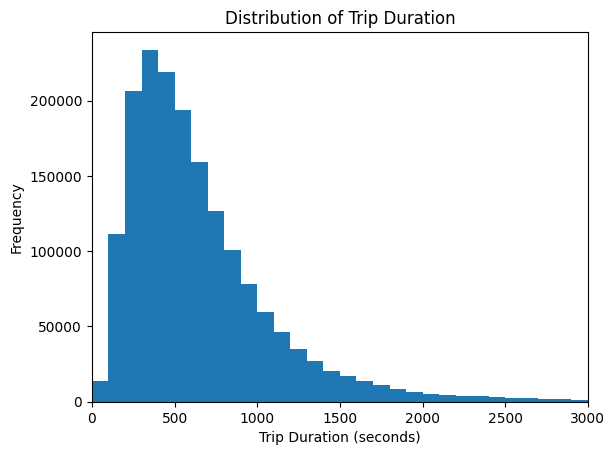

In [17]:
#1. average trip
bin_edge = np.arange(0, df_bike['duration_sec'].max()+100, 100)
plt.hist(data=df_bike, x='duration_sec', bins=bin_edge)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0,3000)
plt.show()

This plot suggests that it is right screwed with long tail on the right. <br>
This plot does not give us much information. Changing the unit from sec to mins

In [18]:
df_bike['duration_min'] = df_bike['duration_sec']/60
df_bike.drop('duration_sec', axis=1, inplace=True)

In [19]:
df_bike.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
3,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,19.0,Post St at Kearny St,5422,Subscriber,1986.0,Male,Yes,509.166667
5,2018-12-31 23:59:11.8820,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),368.0,Myrtle St at Polk St,5549,Subscriber,1982.0,Male,Yes,35.816667
6,2018-12-31 23:46:24.9430,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,44.0,Civic Center/UN Plaza BART Station (Market St ...,4706,Customer,1973.0,Male,No,41.700000
7,2018-12-31 22:11:22.5060,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),16.0,Steuart St at Market St,5518,Customer,1995.0,Male,No,136.700000
8,2018-12-31 23:47:19.2100,2019-01-01 00:23:30.1300,6.0,The Embarcadero at Sansome St,21.0,Montgomery St BART Station (Market St at 2nd St),4800,Customer,1999.0,Female,No,36.166667


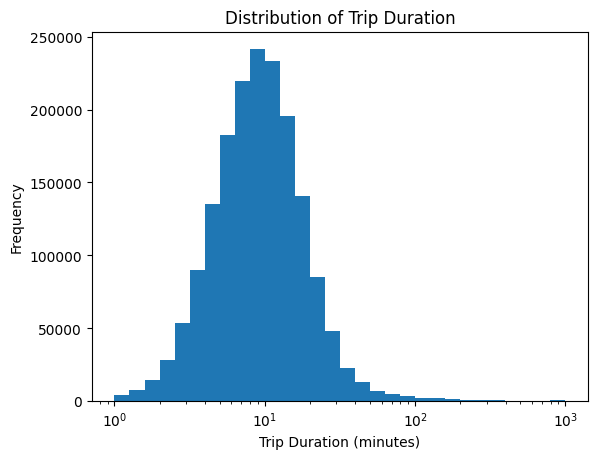

In [20]:
bin_edges=10**np.arange(0, 3+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df_bike, x='duration_min', bins=bin_edges)
plt.xticks(ticks, labels)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.xscale('log')
plt.ylabel('Frequency')
plt.show()

Thus, most people tend to use the bikes for short-time trips ( around 10 mins).

Now, comparing if there is any difference in trip duration due to weather.

In [21]:
#2. Effect due to weather
df_bike['month'] = pd.to_datetime(df_bike['start_time']).dt.month

In [24]:
df_bike['month'].value_counts()

,count
month,
10,191485
7,183694
6,181405
8,178375
9,174768
5,167376
11,128564
12,126162
4,121791


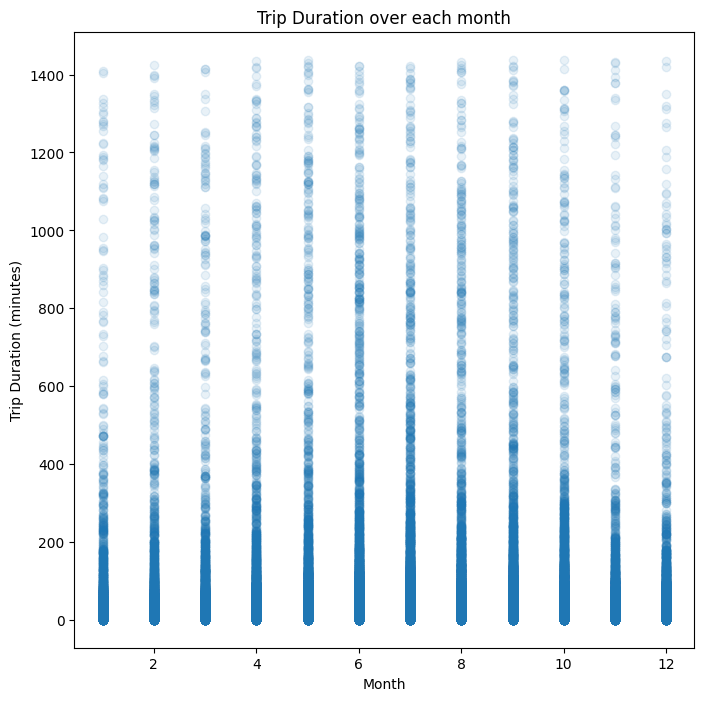

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(data=df_bike, x='month', y='duration_min', alpha=0.1)
plt.title('Trip Duration over each month')
plt.xlabel('Month')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Therefore, June to August has the most duration.

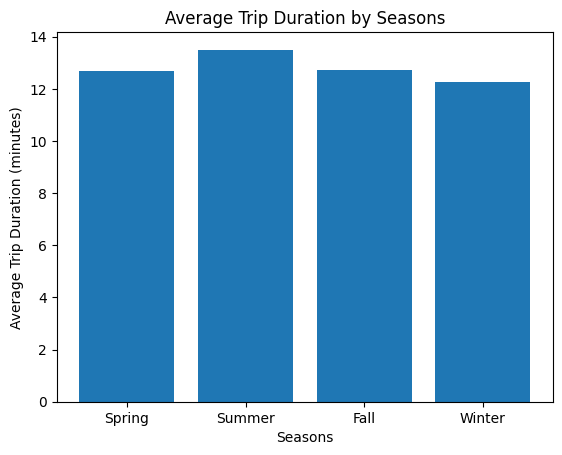

In [30]:
#creating category in months
spring_dur = df_bike.query('month in [3,4,5]').duration_min.mean()
summer_dur = df_bike.query('month in [6,7,8]').duration_min.mean()
fall_dur = df_bike.query('month in [9,10,11]').duration_min.mean()
winter_dur = df_bike.query('month in [12,1,2]').duration_min.mean()

# Create lists for x and y values
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
avg_durations = [spring_dur, summer_dur, fall_dur, winter_dur]

# Pass the x and y values as separate arguments
plt.bar(seasons, avg_durations)

plt.title('Average Trip Duration by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [31]:
spring_dur, summer_dur, fall_dur, winter_dur

(12.676228947113001,
 13.502742602835337,
 12.737824421284367,
 12.281753333055336)

**Conclusion**:
1. Summer has the longest trip duration, with average above 13mins.
2. There isnt much difference in the average duration seasonwise. Possible reason due the less climate change in the area.

In [32]:
#3. Does the above depend on if a user is a subscriber or customer?
df_bike['user_type'].value_counts()

,count
user_type,
Subscriber,1542367
Customer,199189


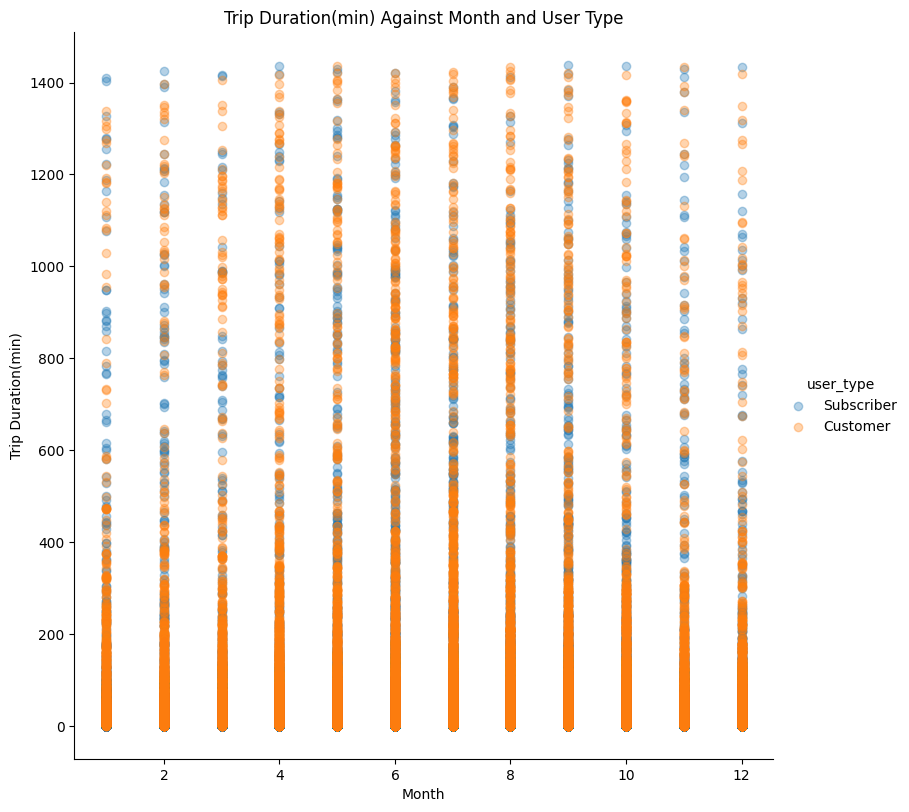

In [35]:
g = sns.FacetGrid(data =  df_bike, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

**Conclusion**: As we can see through the plot above, there are far more customers than subscribers. The user type does make an impact on trip duration.

An interesting point found is that the subscribers tend to rent the bikes for long trips, above 300 minutes.